In [76]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [77]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('imbd_cleaned.csv')
df = df.drop(columns=['outlier_pt_hbos'])
df.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,countryOfOrigin,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
0,Carmencita,"(5, 6]",1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,short,0.0,0,0,7,2.833213,['US'],"Documentary,Short",0.693147,1.386294,5.7,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",2.302585,0.0,0.693147,['silent'],0.0
1,Un bon bock,"(5, 6]",1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,short,0.0,0,0,6,0.693147,['FR'],"Animation,Short",0.000000,0.000000,5.4,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",1.386294,0.0,0.693147,['silent'],0.0
2,Chinese Opium Den,"(4, 5]",1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,short,0.0,0,0,5,0.000000,['US'],Short,0.000000,0.693147,5.0,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",1.609438,0.0,0.693147,['silent'],0.0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,short,0.0,0,0,6,3.044522,['US'],"Documentary,Short",0.693147,1.945910,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",1.945910,0.0,0.693147,['silent'],0.0
4,Autour d'une cabine,"(6, 7]",1894,2.0,0.000000,7.107425,2.772589,0.0,1,0.000000,short,0.0,0,0,6,2.197225,['FR'],"Animation,Short",0.000000,0.000000,6.1,"['\\N', 'ES', 'US', 'FR', 'HU', 'RU', 'UA']",1.386294,0.0,0.693147,['silent'],0.0


In [78]:
# Mappa di raggruppamento
category_mapping = {
    'movie': 'Movies',
    'tvMovie': 'Movies',
    'short': 'Shorts',
    'tvShort': 'Shorts',
    'tvSeries': 'TV Series',
    'tvMiniSeries': 'TV Series',
    'tvEpisode': 'TV Series',
    'tvSpecial': 'TV Special',
    'video': 'Video',
    'videoGame': 'Videogame'
}

# Applicare la mappa al dataframe
df['titleType'] = df['titleType'].map(category_mapping)

In [79]:
# df = pd.read_csv('imbd_log.csv')

df_class = pd.concat([
    df.select_dtypes(include=['number']).drop(['averageRating'], axis=1),
    df[['titleType']]
], axis=1)

feature_names = df_class.columns

X = df_class.values

# X = df.select_dtypes(include=['number'])
# X = X.drop(['averageRating'], axis = 1)
# X = X.values
y = np.array(df['rating'])

In [80]:
df_class.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,castNumber,companiesNumber,externalLinks,writerCredits,directorsCredits,quotesTotal,titleType
0,1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,0.0,0,0,7,2.833213,0.693147,1.386294,2.302585,0.0,0.693147,0.0,Shorts
1,1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,0.0,0,0,6,0.693147,0.000000,0.000000,1.386294,0.0,0.693147,0.0,Shorts
2,1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,0.0,0,0,5,0.000000,0.000000,0.693147,1.609438,0.0,0.693147,0.0,Shorts
3,1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,0.0,0,0,6,3.044522,0.693147,1.945910,1.945910,0.0,0.693147,0.0,Shorts
4,1894,2.0,0.000000,7.107425,2.772589,0.0,1,0.000000,0.0,0,0,6,2.197225,0.000000,0.000000,1.386294,0.0,0.693147,0.0,Shorts


In [81]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'TV Series'

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
clf = RandomForestClassifier(n_estimators=300, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='sqrt', 
                             random_state=0, 
                             n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4308558356508478
F1-score [0.32432432 0.2        0.05089059 0.1025641  0.19344524 0.32954148
 0.42156191 0.55324302 0.31057118 0.28160575]
              precision    recall  f1-score   support

      (0, 1]       0.55      0.23      0.32        26
      (1, 2]       0.59      0.12      0.20       141
      (2, 3]       0.25      0.03      0.05       353
      (3, 4]       0.34      0.06      0.10      1027
      (4, 5]       0.35      0.13      0.19      2719
      (5, 6]       0.37      0.30      0.33      6372
      (6, 7]       0.40      0.45      0.42     11643
      (7, 8]       0.47      0.68      0.55     14463
      (8, 9]       0.43      0.24      0.31      6563
     (9, 10]       0.61      0.18      0.28      1281

    accuracy                           0.43     44588
   macro avg       0.44      0.24      0.28     44588
weighted avg       0.42      0.43      0.41     44588



In [ ]:
classification_report(y_test, y_pred, output_dict=True)

{'(0, 1]': {'precision': 0.5454545454545454,
  'recall': 0.23076923076923078,
  'f1-score': 0.32432432432432434,
  'support': 26.0},
 '(1, 2]': {'precision': 0.5862068965517241,
  'recall': 0.12056737588652482,
  'f1-score': 0.2,
  'support': 141.0},
 '(2, 3]': {'precision': 0.25,
  'recall': 0.028328611898016998,
  'f1-score': 0.05089058524173028,
  'support': 353.0},
 '(3, 4]': {'precision': 0.34065934065934067,
  'recall': 0.06037000973709834,
  'f1-score': 0.10256410256410256,
  'support': 1027.0},
 '(4, 5]': {'precision': 0.35106382978723405,
  'recall': 0.13350496506068407,
  'f1-score': 0.19344524380495604,
  'support': 2719.0},
 '(5, 6]': {'precision': 0.37242879746835444,
  'recall': 0.29551161330822345,
  'f1-score': 0.3295414770738537,
  'support': 6372.0},
 '(6, 7]': {'precision': 0.3972644376899696,
  'recall': 0.44902516533539466,
  'f1-score': 0.42156190783372977,
  'support': 11643.0},
 '(7, 8]': {'precision': 0.4667363619083824,
  'recall': 0.6791122173822859,
  'f1-sc

In [ ]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"(0, 1]": {"precision": 0.5454545454545454, "recall": 0.23076923076923078, "f1-score": 0.32432432432432434, "support": 26.0}, "(1, 2]": {"precision": 0.5862068965517241, "recall": 0.12056737588652482, "f1-score": 0.2, "support": 141.0}, "(2, 3]": {"precision": 0.25, "recall": 0.028328611898016998, "f1-score": 0.05089058524173028, "support": 353.0}, "(3, 4]": {"precision": 0.34065934065934067, "recall": 0.06037000973709834, "f1-score": 0.10256410256410256, "support": 1027.0}, "(4, 5]": {"precision": 0.35106382978723405, "recall": 0.13350496506068407, "f1-score": 0.19344524380495604, "support": 2719.0}, "(5, 6]": {"precision": 0.37242879746835444, "recall": 0.29551161330822345, "f1-score": 0.3295414770738537, "support": 6372.0}, "(6, 7]": {"precision": 0.3972644376899696, "recall": 0.44902516533539466, "f1-score": 0.42156190783372977, "support": 11643.0}, "(7, 8]": {"precision": 0.4667363619083824, "recall": 0.6791122173822859, "f1-score": 0.5532430225026052, "support": 14463.0}, "(8, 

In [ ]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'(0, 1]': {'precision': 0.5454545454545454,
  'recall': 0.23076923076923078,
  'f1-score': 0.32432432432432434,
  'support': 26.0},
 '(1, 2]': {'precision': 0.5862068965517241,
  'recall': 0.12056737588652482,
  'f1-score': 0.2,
  'support': 141.0},
 '(2, 3]': {'precision': 0.25,
  'recall': 0.028328611898016998,
  'f1-score': 0.05089058524173028,
  'support': 353.0},
 '(3, 4]': {'precision': 0.34065934065934067,
  'recall': 0.06037000973709834,
  'f1-score': 0.10256410256410256,
  'support': 1027.0},
 '(4, 5]': {'precision': 0.35106382978723405,
  'recall': 0.13350496506068407,
  'f1-score': 0.19344524380495604,
  'support': 2719.0},
 '(5, 6]': {'precision': 0.37242879746835444,
  'recall': 0.29551161330822345,
  'f1-score': 0.3295414770738537,
  'support': 6372.0},
 '(6, 7]': {'precision': 0.3972644376899696,
  'recall': 0.44902516533539466,
  'f1-score': 0.42156190783372977,
  'support': 11643.0},
 '(7, 8]': {'precision': 0.4667363619083824,
  'recall': 0.6791122173822859,
  'f1-sc

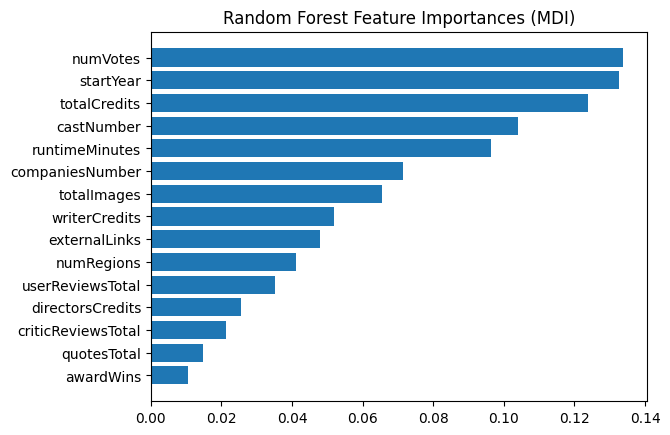

In [ ]:
# Questo pezzo di codice visualizza le 15 feature più importanti usate dal modello Random Forest addestrato (clf)
# in base alla Mean Decrease in Impurity (MDI), ovvero alla riduzione media dell’impurità (Gini Index/Entropy) 
# che ogni feature contribuisce a ottenere negli split degli alberi.

nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]  # le 15 più importanti

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
clf.estimators_[0]  

DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

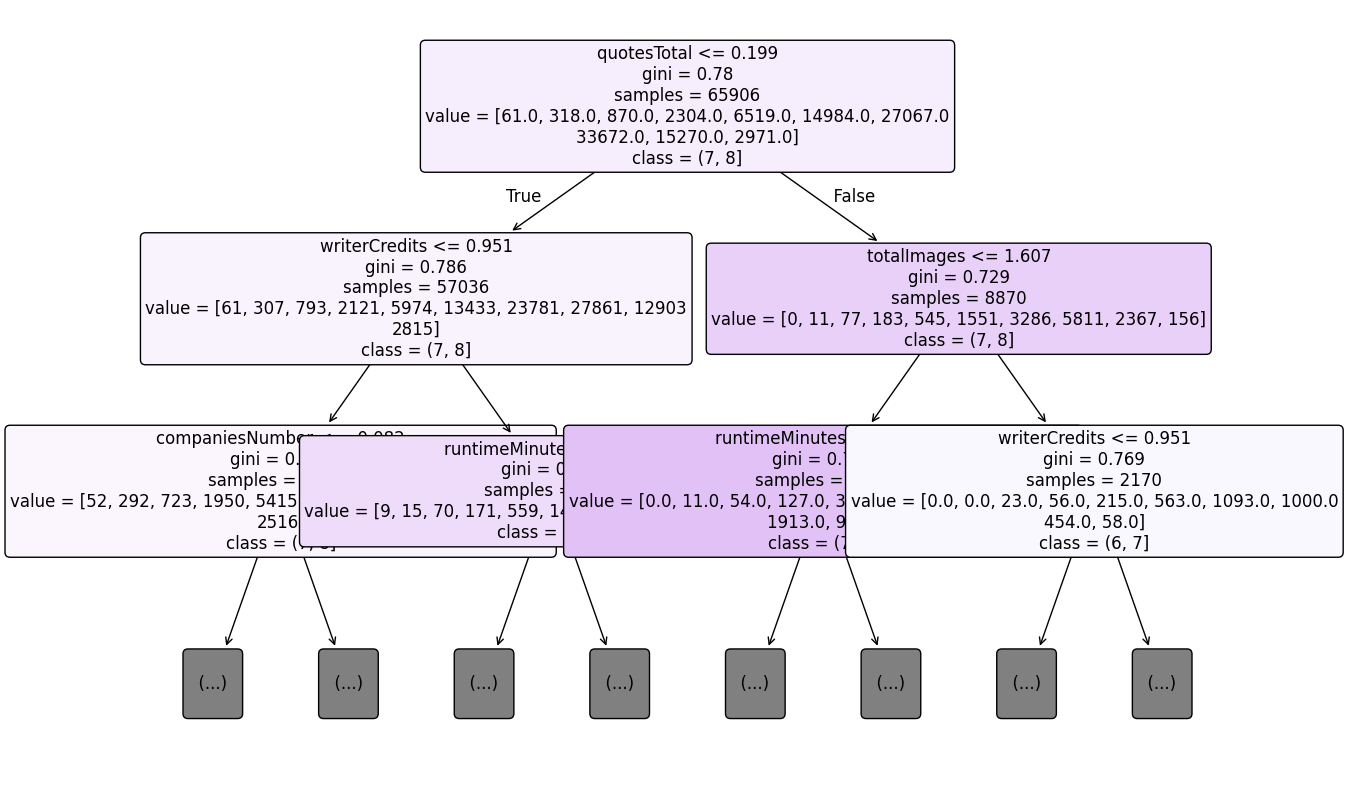

In [ ]:
plt.figure(figsize=(14,10))
plot_tree(clf.estimators_[0], 
          feature_names=feature_names, 
          class_names=['(0, 1]', '(1, 2]', '(2, 3]', '(3, 4]', '(4, 5]', '(5, 6]', '(6, 7]', '(7, 8]', '(8, 9]', '(9, 10]'],
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

C:\Users\Tommaso\AppData\Local\Temp\ipykernel_14808\3330109390.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])


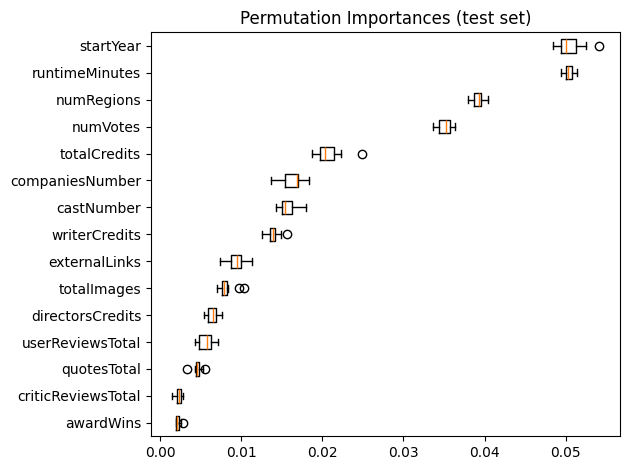

In [ ]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

n_estimators=100, OOB Score=0.4223
n_estimators=200, OOB Score=0.4308
n_estimators=300, OOB Score=0.4332
n_estimators=500, OOB Score=0.4342
n_estimators=600, OOB Score=0.4348
n_estimators=700, OOB Score=0.4352
n_estimators=800, OOB Score=0.4347
n_estimators=900, OOB Score=0.4356
n_estimators=1000, OOB Score=0.4361


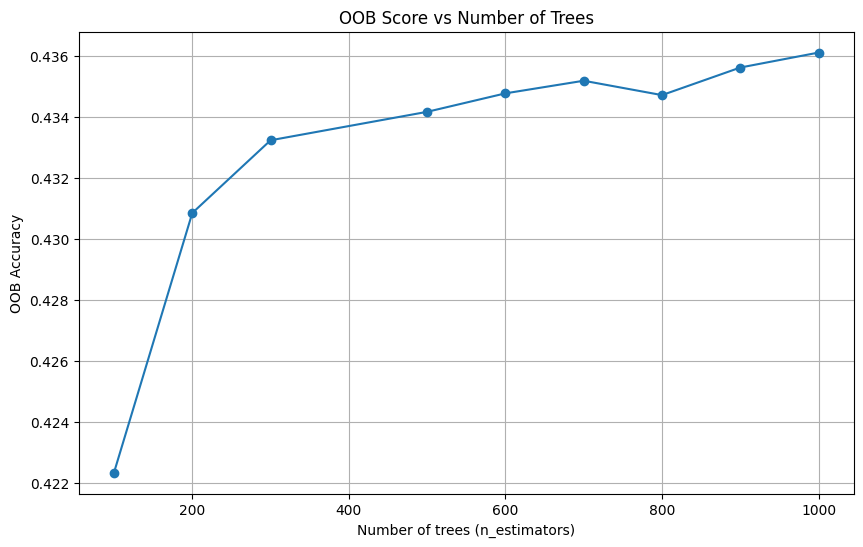

In [ ]:
# Parametri da testare
n_estimators_list = [100, 200, 300, 500, 600, 700, 800, 900, 1000]
oob_scores = []

# Addestramento e calcolo OOB
for n in n_estimators_list:
    clf1 = RandomForestClassifier(n_estimators=n, oob_score=True, bootstrap=True, random_state=42, n_jobs=-1)
    clf1.fit(X_train, y_train)
    oob_scores.append(clf1.oob_score_)
    print(f'n_estimators={n}, OOB Score={clf1.oob_score_:.4f}')

# Plot dell'andamento dell’OOB score
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, oob_scores, marker='o')
plt.xlabel('Number of trees (n_estimators)')
plt.ylabel('OOB Accuracy')
plt.title('OOB Score vs Number of Trees')
plt.grid(True)
plt.show()


In [ ]:
# Return probability estimates for the test data X.
y_test_pred_proba = clf.predict_proba(X_test)
y_test_pred_proba[0:10]

array([[0.09885756, 0.0992187 , 0.09930233, 0.09962959, 0.09992796,
        0.1003458 , 0.1007293 , 0.10102079, 0.10078065, 0.10018731],
       [0.09877052, 0.09896776, 0.09952578, 0.09985508, 0.10030244,
        0.10038475, 0.10079323, 0.10096547, 0.10062277, 0.0998122 ],
       [0.0987709 , 0.09917413, 0.09971136, 0.1000771 , 0.10044664,
        0.10074331, 0.10081454, 0.10054803, 0.10020993, 0.09950407],
       [0.09887286, 0.09911587, 0.09944572, 0.09971328, 0.10023559,
        0.10044851, 0.10081388, 0.10090161, 0.10066215, 0.09979053],
       [0.09887384, 0.09956894, 0.09952759, 0.09988214, 0.10007214,
        0.10036201, 0.10052414, 0.1006413 , 0.10033988, 0.100208  ],
       [0.09885769, 0.09921884, 0.09940582, 0.09962972, 0.09992809,
        0.10034594, 0.10066279, 0.10100299, 0.10078079, 0.10016732],
       [0.09876976, 0.09894077, 0.09929349, 0.09957271, 0.09999502,
        0.10036414, 0.10085161, 0.1012709 , 0.10089929, 0.10004231],
       [0.09877039, 0.09908597, 0.0993985

In [ ]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


In [ ]:
# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_test_binarized = label_binarize(y_test, classes=classes)

y_test_binarized


array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(44588, 10))

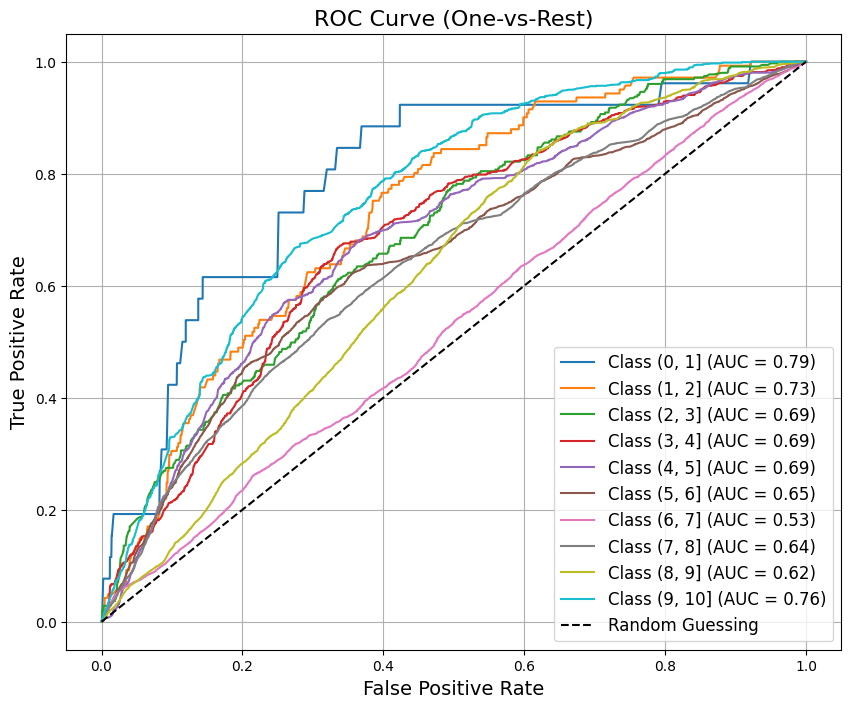

In [ ]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate", fontsize = 14)
plt.ylabel("True Positive Rate", fontsize = 14)
plt.title("ROC Curve (One-vs-Rest)", fontsize = 16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()


In [ ]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_test_pred_proba, multi_class="ovr", average="macro")

np.float64(0.6781740012385378)

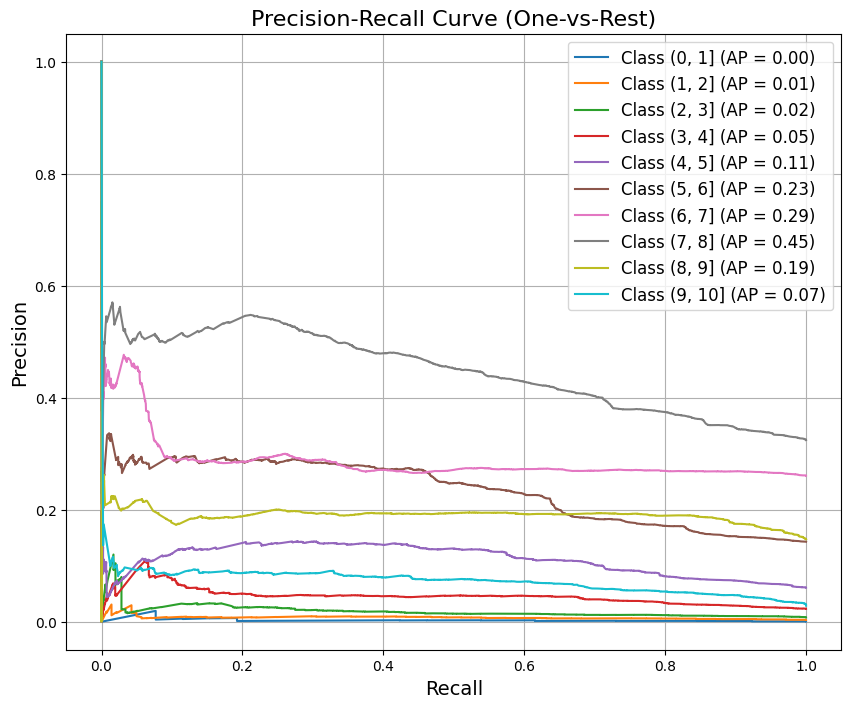

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()

# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

In [ ]:
clf = AdaBoostClassifier(estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3565757602942496
F1-score [0.         0.         0.         0.         0.01434206 0.13753708
 0.32693523 0.52287767 0.01440753 0.00460476]
              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       141
      (2, 3]       0.00      0.00      0.00       353
      (3, 4]       0.00      0.00      0.00      1027
      (4, 5]       0.29      0.01      0.01      2719
      (5, 6]       0.23      0.10      0.14      6372
      (6, 7]       0.30      0.36      0.33     11643
      (7, 8]       0.40      0.76      0.52     14463
      (8, 9]       0.21      0.01      0.01      6563
     (9, 10]       0.14      0.00      0.00      1281

    accuracy                           0.36     44588
   macro avg       0.16      0.12      0.10     44588
weighted avg       0.29      0.36      0.28     44588



c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [ ]:
# clf = AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=100), n_estimators=10, random_state=0)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))